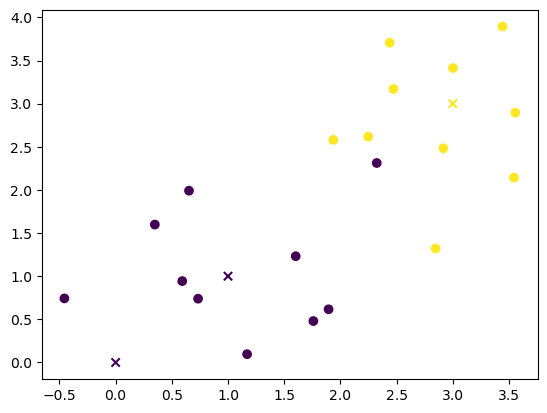

In [100]:
import numpy as np
def dist(X: np.ndarray, Y: np.ndarray) -> float:
    return np.sqrt((X-Y).T @ (X-Y))

def knn(X_train: np.ndarray, k: int, X: np.ndarray, y: np.ndarray) -> int:
    distances = []

    for X_i in X_train:
        distances.append(dist(X_i, X))

    candidates = np.argsort(distances)[:k]
    return 1 if sum([y[c] for c in candidates]) > (len(candidates)/2) else 0

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=20,
                  centers = [[1,1], [3,3]],
                  random_state=123,
                  cluster_std=0.6)

import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)


X1 = [3,3] # expect 1 = yellow
X2 = [0,0] # expect 0 = purple
X3 = [1,1] # expect 0 (purple)
k = 5
X_test = np.array([X1, X2, X3])
y_test = np.array([knn(X, k, p,y) for p in X_test])
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, marker='x')
plt.show()